# Sea Level Data Scrub & Linear Regression

In [1]:
# Necessary Imports 
%matplotlib inline 

import requests 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lin
from datetime import timedelta, datetime
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from datetime import timedelta, datetime
from sklearn.linear_model import LinearRegression
from io import StringIO

In [2]:
sea_data_df = pd.read_csv("../Data/GMSL_merged_nasa_1993_2020.csv")
sea_data_df.head()

,year_fraction,gmsl
0,1993.011526,92.66
1,1993.038692,95.39
2,1993.065858,92.29
3,1993.093025,96.20
4,1993.120191,94.64


In [3]:
# Conversion Formula For Date
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days = (number - year) * 365.25)
    day_one = datetime(year, 1, 1)
    date = d + day_one
    return date

In [4]:
# Get Results
sea_data_df["date"] = sea_data_df["year_fraction"].apply(convert_partial_year)

# Drop Unused Column
sea_data_df = sea_data_df.drop(["year_fraction"], axis=1)
sea_data_df.head()

,gmsl,date
0,92.66,1993-01-05 05:02:12.897600
1,95.39,1993-01-15 03:10:26.659203
2,92.29,1993-01-25 01:18:40.420798
3,96.20,1993-02-03 23:27:25.739997
4,94.64,1993-02-13 21:35:39.501599


In [5]:
#Get the Year
sea_data_df["year"] = sea_data_df["date"].apply(lambda x : x.year)

# Drop Unused Date
sea_data_df = sea_data_df.drop(["date"], axis=1)

# Re-order Columns
sea_data_df = sea_data_df[["year", "gmsl"]]
sea_data_df

,year,gmsl
0,1993,92.66
1,1993,95.39
2,1993,92.29
3,1993,96.20
4,1993,94.64
...,...,...
991,2019,105.40
992,2019,101.96
993,2019,100.10
994,2020,98.39


In [6]:
# Rename Columns 
sea_data_df.columns = ["Year", "GMSL"]
sea_data_df

,Year,GMSL
0,1993,92.66
1,1993,95.39
2,1993,92.29
3,1993,96.20
4,1993,94.64
...,...,...
991,2019,105.40
992,2019,101.96
993,2019,100.10
994,2020,98.39


In [7]:
# GroupBy, Reset Index, Drop After 2015, Find Average GMSL
sea_data_df = sea_data_df.groupby("Year")["GMSL"].mean().reset_index()
data = sea_data_df
sea_data_df = sea_data_df.drop(sea_data_df.index[23:28])

In [8]:
# Convert Values Into Array
X = data.iloc[:, 0].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = data.iloc[:, 1].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

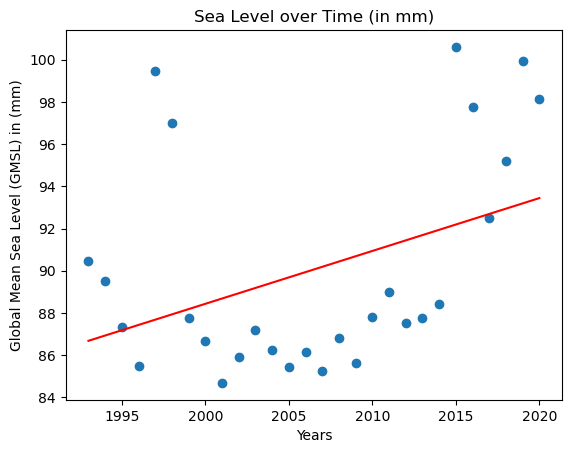

In [9]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlabel("Years")
plt.ylabel("Global Mean Sea Level (GMSL) in (mm)")
plt.title("Sea Level over Time (in mm)")

#Save Plot
plt.savefig("../Images/SealevelScrubFig1.png")

In [10]:
# Convert Values Into Array
X = sea_data_df.iloc[:, 0].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = sea_data_df.iloc[:, 1].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

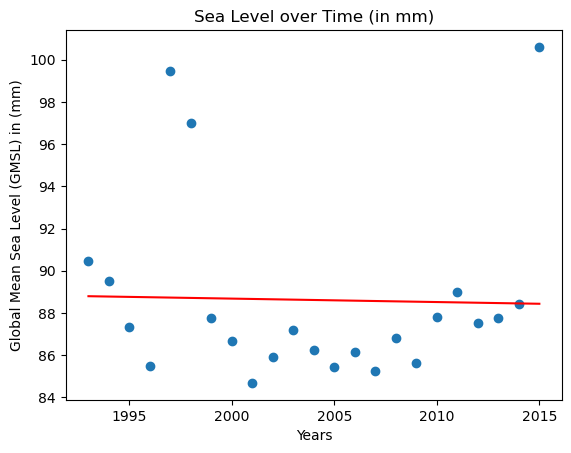

In [11]:
# Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlabel("Years")
plt.ylabel("Global Mean Sea Level (GMSL) in (mm)")
plt.title("Sea Level over Time (in mm)")

# Save Plot
plt.savefig("../Images/SealevelScrubFig2.png")

In [12]:
# Sealevel Data To CSV File
sea_data_df.to_csv("../Data/sealevel_data.csv", index = False, header = True)